In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from ydata_profiling import ProfileReport

sns.set(style="whitegrid") #Seaborn library ke plots ka default look change karna.

In [2]:
!git clone "https://github.com/HarshvardhanSingh-13/Datasets.git"

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [3]:
df = pd.read_csv('./Datasets/Titanic_Dataset/Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
median = df['Age'].median()
print("Median Age:", median)

Median Age: 28.0


In [11]:
df['Age'] = df['Age'].fillna(median)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Embarked'].mode()[0] #Embarked column ki sabse zyada baar aane wali value nikalna. [0]Mode series ka pehla element uthata hai, usually vhi actual mode value hota hai.

'S'

In [14]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
df['has_cabin'] = df['Cabin'].notna().astype(int) #Naya column 'has_cabin' banana jo indicate karega ki passenger ke paas cabin info hai ya nahi. notna() function True return karta hai agar value NaN nahi hai, aur astype(int) ise 1 (True) ya 0 (False) mein convert kar deta hai.

In [17]:
df.drop('Cabin', axis=1, inplace=True) #Ab jab humne 'has_cabin' column bana liya hai, toh original 'Cabin' column ko drop kar dete hain kyunki usme bohot saari missing values hain aur ab wo redundant ho gaya hai.

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
has_cabin      0
dtype: int64

In [20]:
df["has_cabin"].value_counts()

has_cabin
0    687
1    204
Name: count, dtype: int64

In [ ]:
profile = ProfileReport(df, title="My Profiling Report")
profile #pip install ipwidgets

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 154.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Analyzing categorical features:


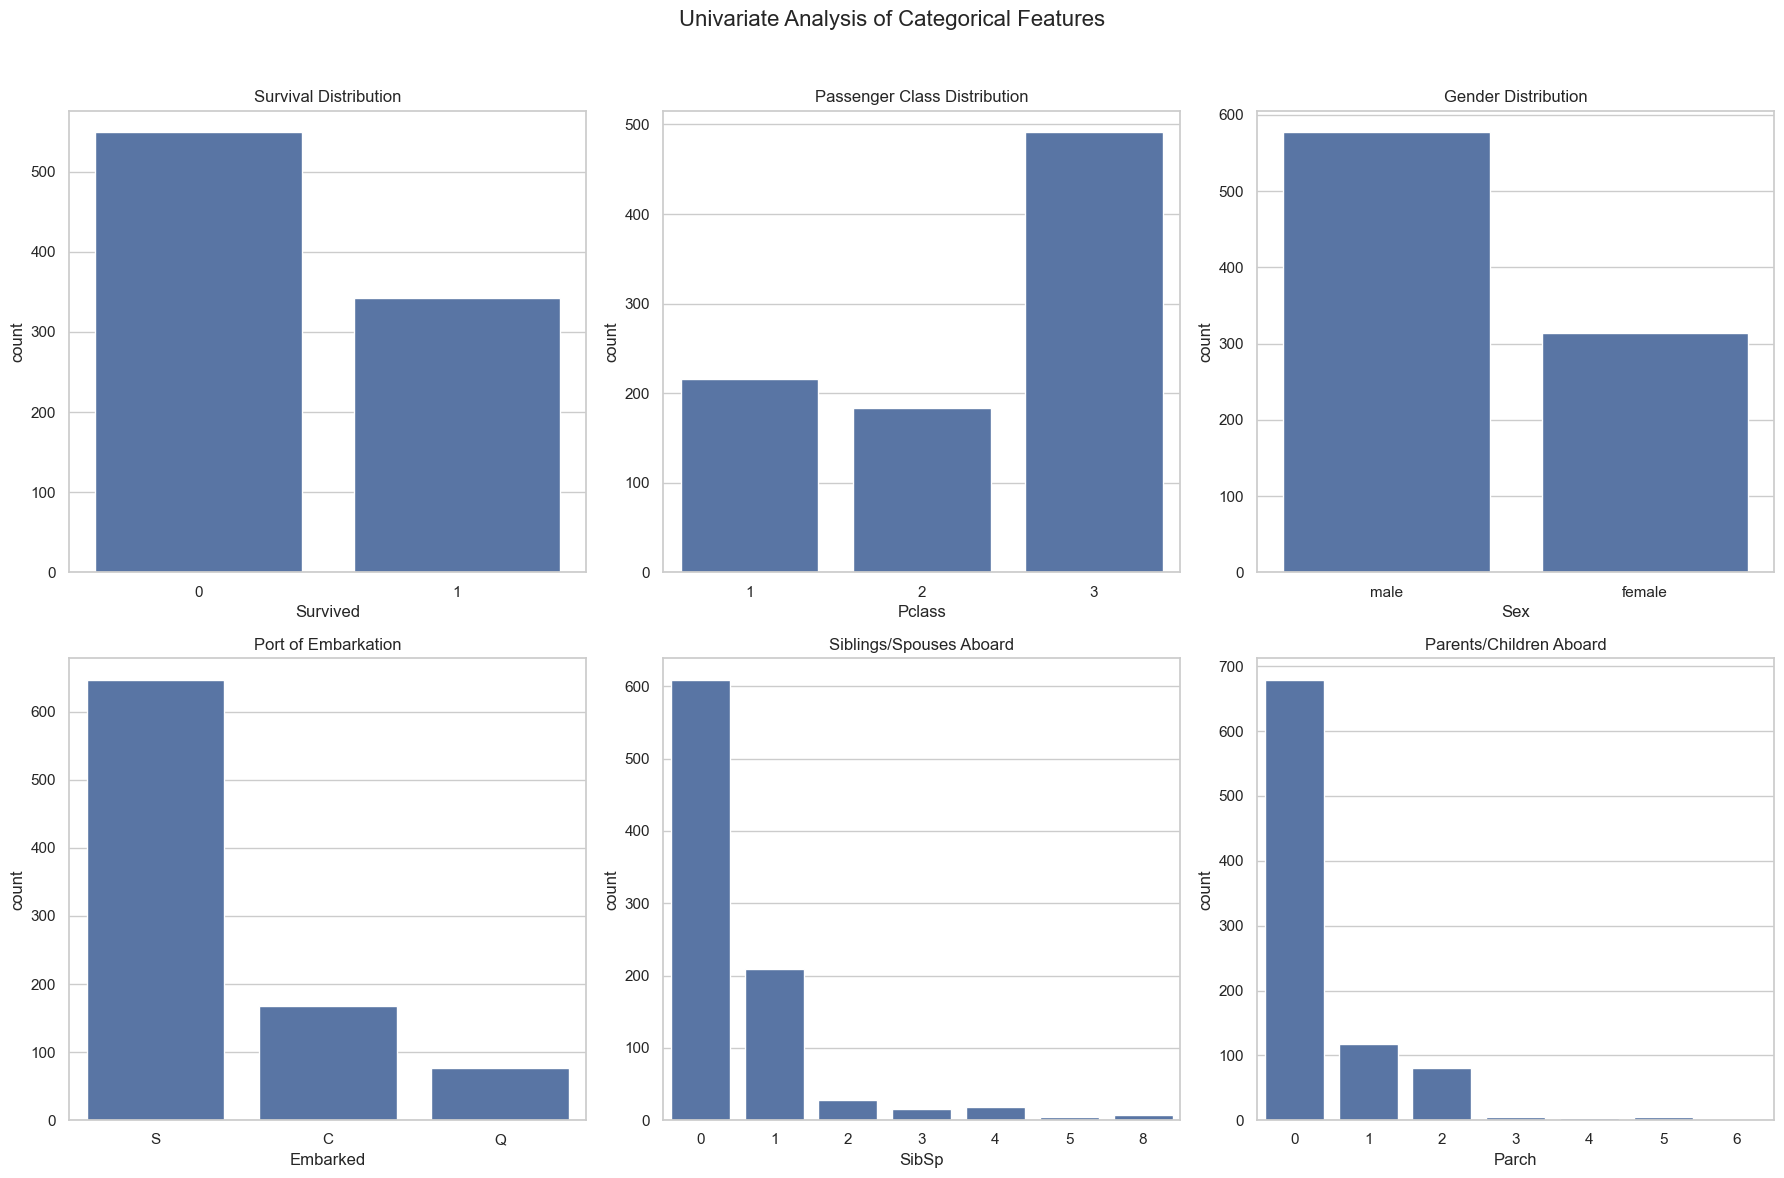

In [ ]:
print("Analyzing categorical features:")

# Set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Analyzing numerical features:


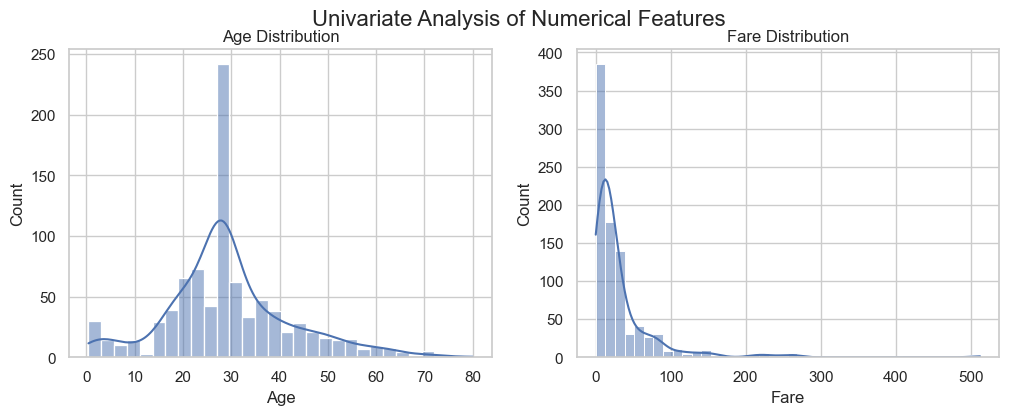

In [ ]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

Bivariate Analysis: Feature vs. Survival


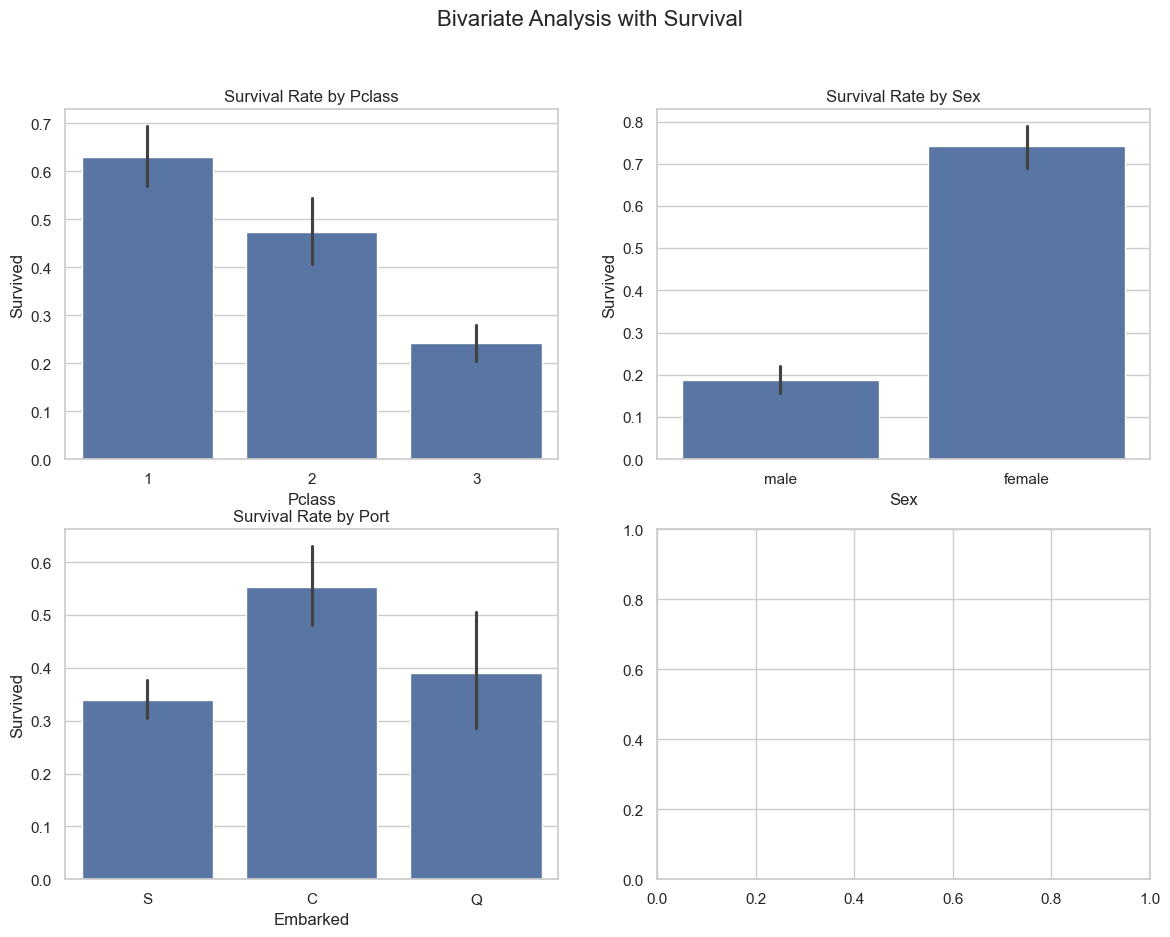

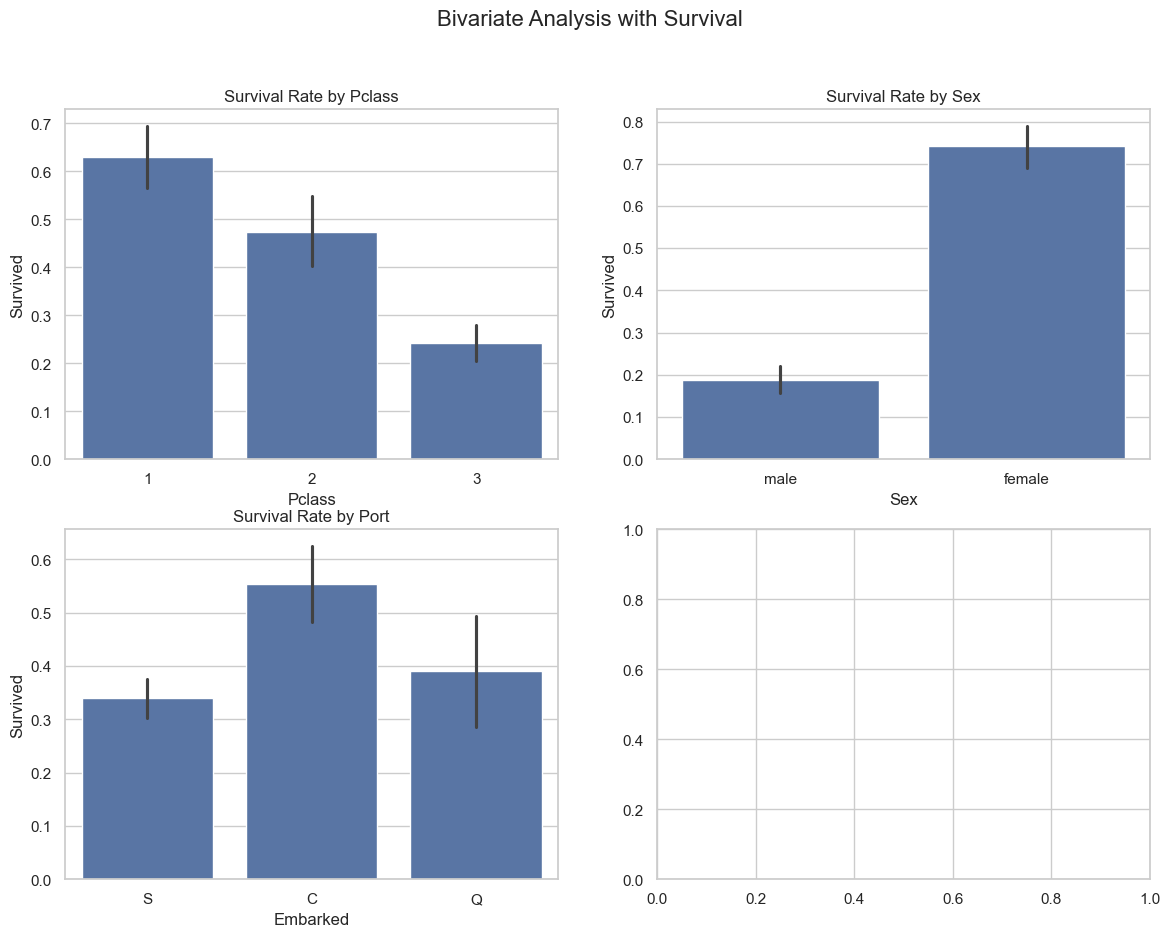

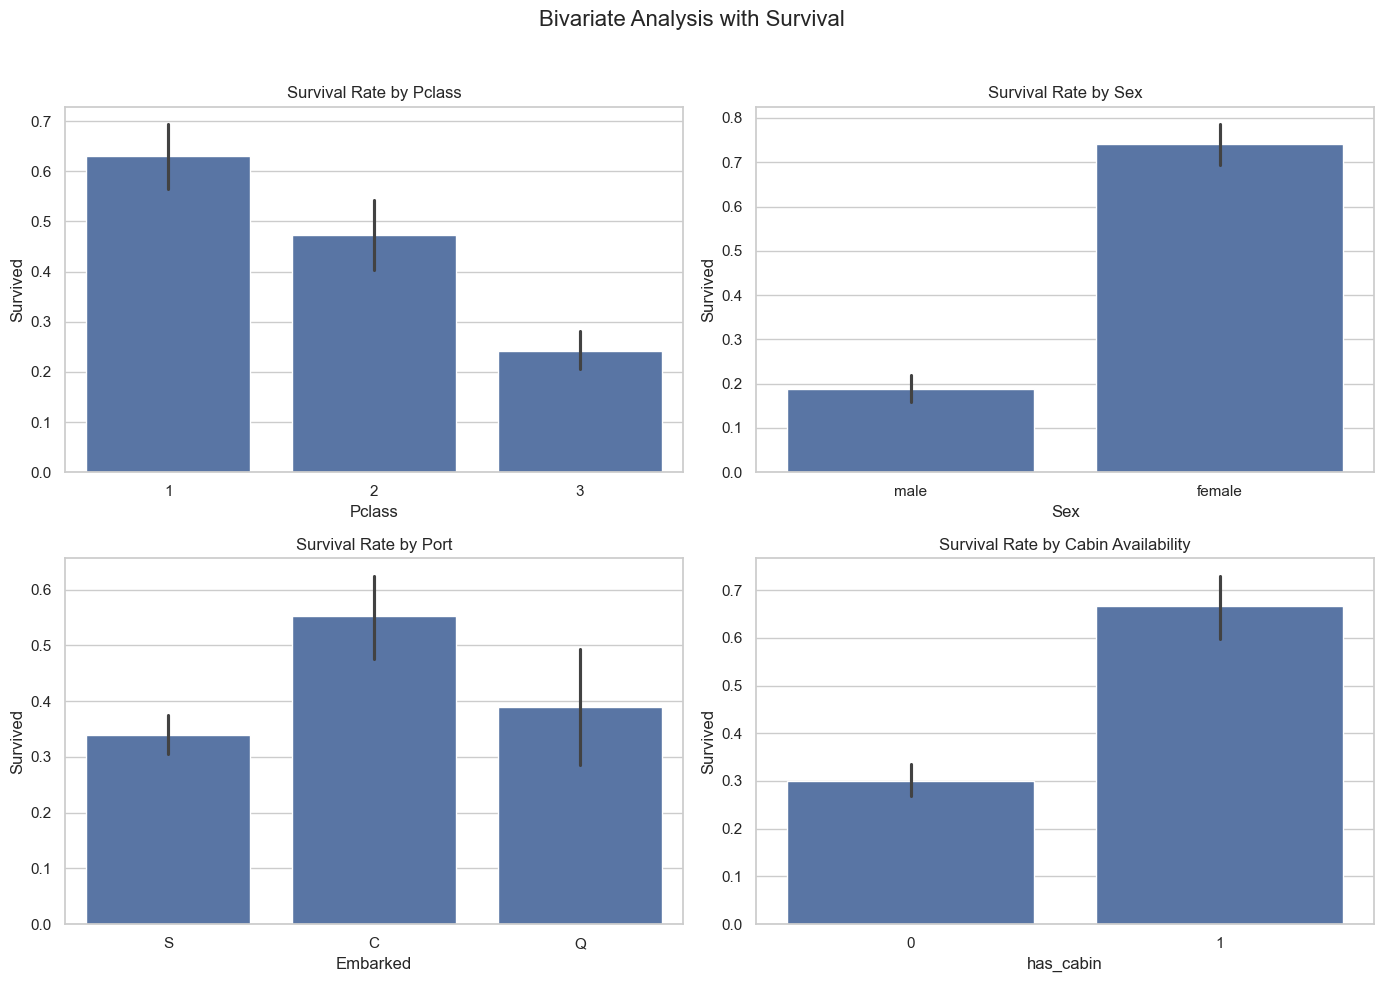

In [ ]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='has_cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

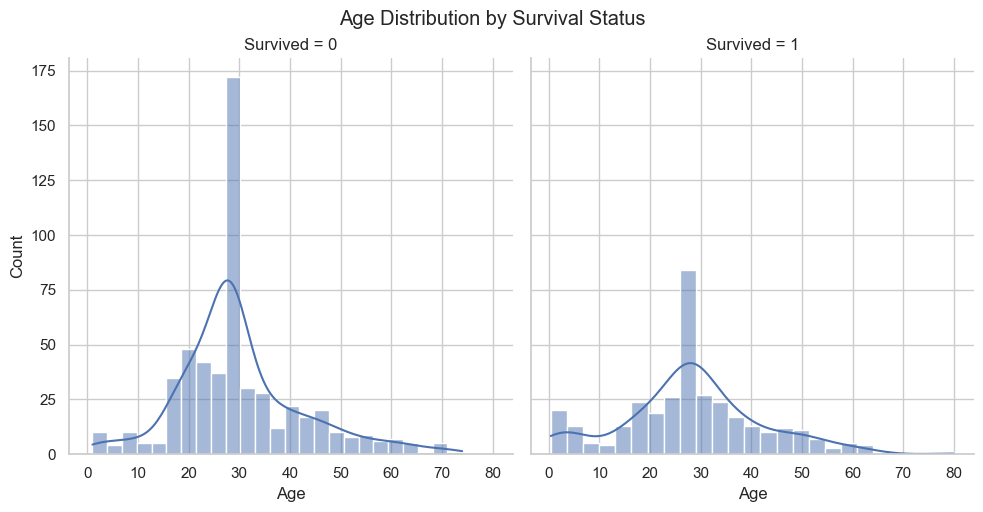

In [ ]:
## Age vs Survival
g = sns.FacetGrid(df,col='Survived',height=5)
g.map(sns.histplot,'Age',bins=25,kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

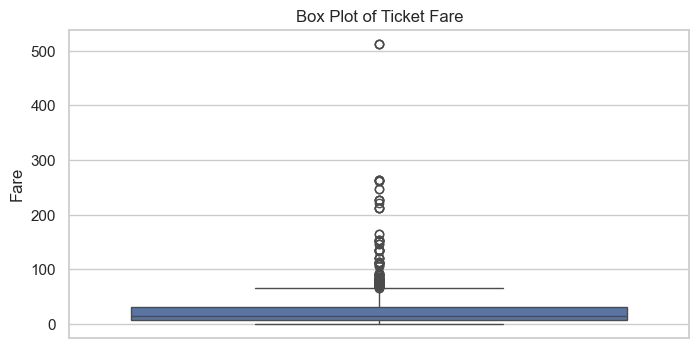

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(y='Fare',data=df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()